# Provenance

One aspect of data provenance is keeping track of the processing steps applied to data.

Next, we will learn how this can be done working with `xarray` objects.

**Note: This is work in progress! Adding provenance information can clutter the attributes of a xarray quite a bit**

In [1]:
import h5rdmtoolbox as h5tbx
import numpy as np
from h5rdmtoolbox import tutorial

h5tbx.set_config(add_provenance=True)

For the example, let's assume a 3D-velocity field with time, y- and x-dimension:

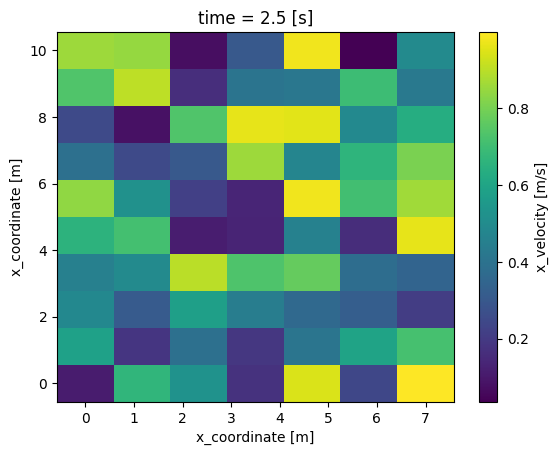

In [2]:
with h5tbx.File() as h5:
    h5.create_dataset('time', data=np.linspace(0, 5, 5), attrs=dict(standard_name='relative_time', units='s'), make_scale=True)
    h5.create_dataset('y', data=np.linspace(0, 10, 10), attrs=dict(standard_name='x_coordinate', units='m'), make_scale=True)
    h5.create_dataset('x', data=np.linspace(0, 7, 7), attrs=dict(standard_name='x_coordinate', units='m'), make_scale=True)
    h5.create_dataset('u', data=np.random.rand(5, 10, 7), attrs=dict(standard_name='x_velocity', units='m/s'), attach_scale=('time', 'y', 'x'))
    u = h5.u[:]

# plot t=2.5 s:
_ = u.sel(time=2.5).plot()

In [3]:
from h5rdmtoolbox.wrapper.accessors import provenance as prov

In [4]:
u_sel = u.prov[0:2,...]#.arithmetic_mean_of(dim='time')

In [5]:
def get_dim_shape(da):
    return {d: len(da[d]) for d in da.dims}
    
def explain_history(da):
    for i, item in enumerate(da.attrs['PROVENANCE']['processing_history']):
        print(i, 'applied ', item['name'], ' on array with shape', item['parent']['dims_shape'])
        print('  -> ', item['name'])
    print('Current shape ', get_dim_shape(da))

explain_history(u_sel)

0 applied  __getitem__  on array with shape {'time': 5, 'y': 10, 'x': 7}
  ->  __getitem__
Current shape  {'time': 2, 'y': 10, 'x': 7}
